### Case Study: Predicting Product Ratings Based on Review Text

#### Description
An e-commerce company wants to predict product ratings based on customer review text to identify potential issues and improve products.

#### Approach

* Data Generation:
Created synthetic product reviews with associated ratings.
Simulated a range of sentiments from positive to negative.

* Sentiment Analysis:
Calculated sentiment scores using TextBlob.
Mapped sentiment polarity to numerical ratings.

* Model Training:
Implemented a Linear Regression model to predict ratings.
Explored the relationship between text sentiment and assigned ratings.

* Evaluation:
Assessed model performance using Mean Squared Error (MSE) and R-squared metrics.
Plotted actual vs. predicted ratings.


In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from textblob import TextBlob
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Data Generation
reviews = [
    "This product exceeded my expectations. Highly recommend!",
    "Not satisfied with the quality. It broke after one use.",
    "Decent value for the price. Could be better.",
    "Absolutely love it! Will buy again.",
    "Terrible experience. Customer service was unhelpful.",
    "Works as advertised. No complaints.",
    "I'm very happy with this purchase.",
    "It's okay, but there are better options available.",
    "Fantastic quality and fast shipping.",
    "The item arrived damaged and late."
]

# Generate synthetic dataset
np.random.seed(42)
num_reviews = 200
data = pd.DataFrame({
    'review_text': np.random.choice(reviews, num_reviews),
})

# Assign synthetic ratings based on review text
def assign_rating(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    # Map polarity to rating between 1 and 5
    rating = int((polarity + 1) * 2) + 1
    return max(1, min(5, rating))

data['rating'] = data['review_text'].apply(assign_rating)

MSE: 0.08
R-squared: 0.92


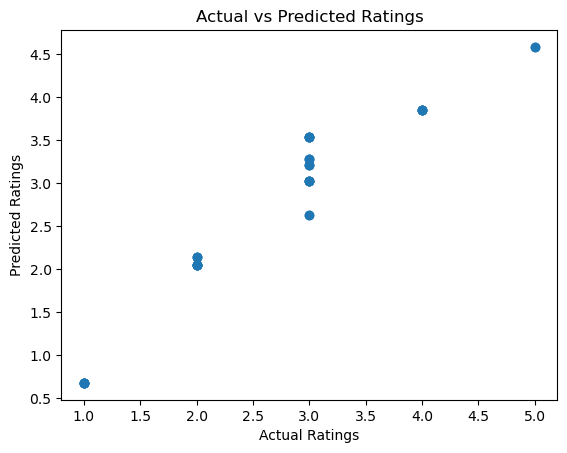

In [2]:
# Step 2: Sentiment Analysis
data['sentiment'] = data['review_text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Step 3: Model Training
X = data[['sentiment']]
y = data['rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
print(f"MSE: {mse:.2f}")
print(f"R-squared: {r_squared:.2f}")

# Plotting actual vs predicted ratings
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs Predicted Ratings')
plt.show()


### Interpretation
* Mean Squared Error (MSE): Approximately 0.08

* R-squared: Approximately 0.92

As expected, the linear regression model on the synthetic dataset showed a strong correlation between sentiment polarity and product ratings. The scatter plot of actual vs. predicted ratings indicated good predictive performance.

### Recommended Next Steps
* Data Expansion: Use a larger dataset with more varied reviews to improve model robustness.

* Advanced Models: Explore regression models that handle non-linear relationships or use classification models for predicting rating categories.

* Text Embeddings: Utilize word embeddings or transformer-based models (e.g., BERT) for capturing deeper semantic information.

* Multilingual Support: Extend the model to handle reviews in multiple languages.

* Feedback Loop: Integrate the model into the review system to flag low-rated products for quality checks.